<a href="https://colab.research.google.com/github/VermaSanjayrk/Hotel-booking-Analysis/blob/main/Sanjay_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROBLEM STATEMENT-**
### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#Accessing the google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Importing the libraries-**


In [2]:
#Importing libraries for Exploratory data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [3]:
# Loading Data set of csv file
HBA=pd.read_csv('/content/drive/MyDrive/1st capstone/Copy of Hotel Bookings.csv')


**First five values of dataset of Hotel Booking analysis**

In [4]:
HBA.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Last five values of dataset of Hotel Booking Analysis**

In [5]:
HBA.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
HBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
HBA.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
len(HBA.columns)

32

In [9]:
list(HBA.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [10]:
HBA.shape

(119390, 32)

In [11]:
type(HBA)

pandas.core.frame.DataFrame

In [12]:
HBA.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
HBA['children'].fillna('unknown',inplace=True)
HBA['country'].fillna('unknown',inplace=True)
HBA['agent'].fillna('unknown',inplace=True)
HBA['company'].fillna('unknown',inplace=True)

In [14]:
HBA.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [15]:
HBA.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

In [16]:
hotel_type=HBA['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [17]:
HBA.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
SLE        1
BFA        1
BDI        1
VGB        1
Name: country, Length: 178, dtype: int64

In [18]:
HBA.children.value_counts()

0.0        110796
1.0          4861
2.0          3652
3.0            76
unknown         4
10.0            1
Name: children, dtype: int64

In [19]:
HBA.agent.value_counts()

9.0        31961
unknown    16340
240.0      13922
1.0         7191
14.0        3640
           ...  
358.0          1
54.0           1
367.0          1
388.0          1
158.0          1
Name: agent, Length: 334, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2c8dc6a610>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

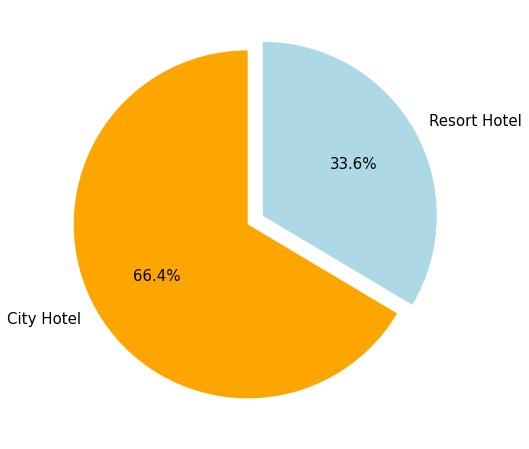

In [20]:
plt.rcParams['figure.figsize']=8,8
labels=hotel_type.index.tolist()
sizes=hotel_type.tolist()
explode=(0,0.1)
colors=['orange','lightblue']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':15})

It seems that a huge proportion of hotels was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel.
Also, resort hotels tend to be appropriate for larger group of people. ## Let's have an overview of the number of people who booked the hotel.

In [21]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
HBA['adults'].groupby(HBA['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [22]:
# Looking into children. 
# Using groupby to group according to hotel types only.
HBA['children'].groupby(HBA['hotel']).describe()

,count,unique,top,freq
hotel,,,,
City Hotel,79330.0,5.0,0.0,74220.0
Resort Hotel,40060.0,5.0,0.0,36576.0


It seems that mean values for adults and children are higher. This means that resort hotels are better choice for large families.

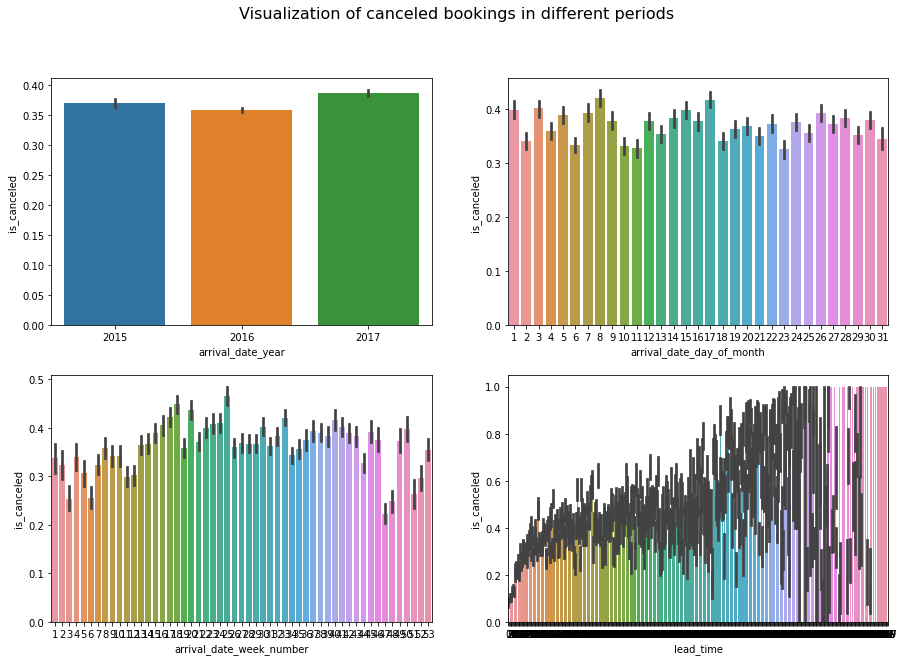

In [23]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Visualization of canceled bookings in different periods', fontsize=16)
sns.barplot(HBA['arrival_date_year'],HBA['is_canceled'],ax=axes[0,0])
sns.barplot(HBA['arrival_date_day_of_month'],HBA['is_canceled'],ax=axes[0,1])
sns.barplot(HBA['arrival_date_week_number'],HBA['is_canceled'],ax=axes[1,0])
sns.barplot(HBA['lead_time'],HBA['is_canceled'],ax=axes[1,1])
plt.show()


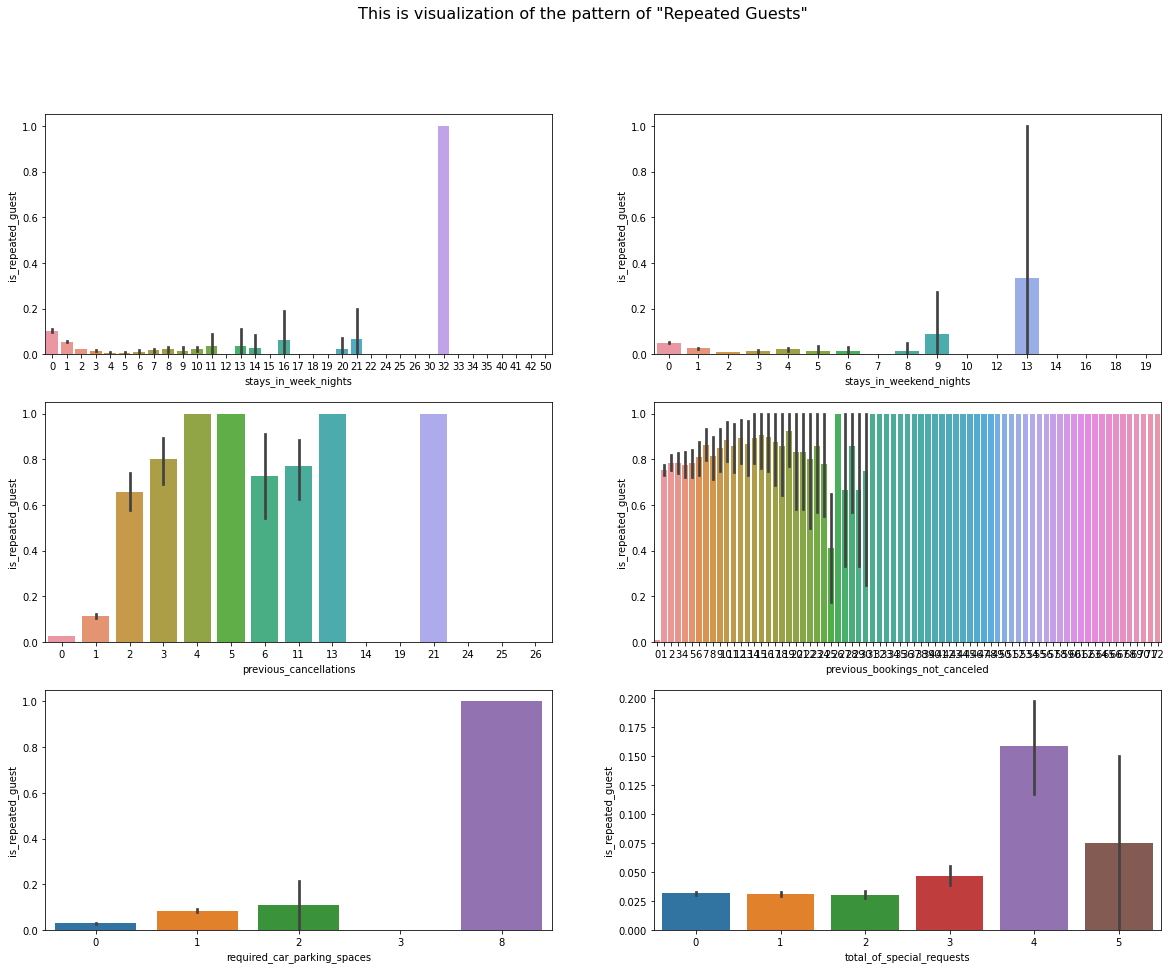

In [24]:
fig,axes = plt.subplots(3,2,figsize=(20,15))
fig.suptitle('This is visualization of the pattern of "Repeated Guests" ', fontsize=16)
sns.barplot(HBA['stays_in_week_nights'],HBA['is_repeated_guest'],ax=axes[0,0])
sns.barplot(HBA['stays_in_weekend_nights'],HBA['is_repeated_guest'],ax=axes[0,1])
sns.barplot(HBA['previous_cancellations'],HBA['is_repeated_guest'],ax=axes[1,0])
sns.barplot(HBA['previous_bookings_not_canceled'],HBA['is_repeated_guest'],ax=axes[1,1])
sns.barplot(HBA['required_car_parking_spaces'],HBA['is_repeated_guest'],ax=axes[2,0])
sns.barplot(HBA['total_of_special_requests'],HBA['is_repeated_guest'],ax=axes[2,1])
plt.show()

**Have you ever wondered when the best time of year to book a hotel room is?**

In [25]:
arrival_month=HBA['arrival_date_month'].value_counts()
arrival_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

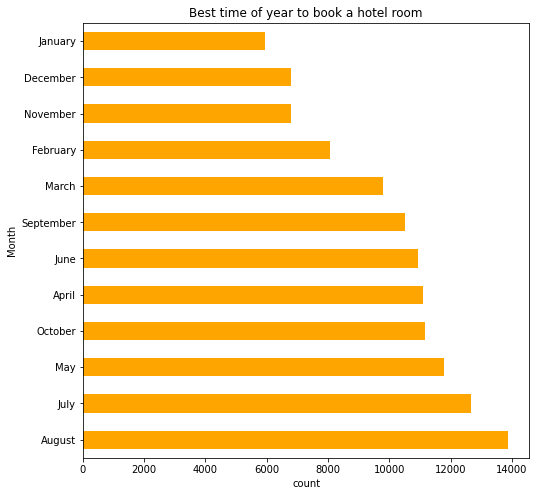

In [26]:
arrival_month.plot(kind='barh',color="orange")
plt.xlabel("count")
plt.ylabel("Month")
plt.title("Best time of year to book a hotel room")
plt.rcParams['figure.figsize']=(15,10)

**Or the optimal length of stay in order to get the best daily rate?** 


In [27]:
#what are the average prices for each person per night by hotel?
def average_daily_rate_person():
    for h in HBA.hotel.unique():
        print(f'Average daily rate per person: {HBA[HBA.hotel == h].adr.mean():.2f} in {h}.')
    return

average_daily_rate_person()

Average daily rate per person: 94.95 in Resort Hotel.
Average daily rate per person: 105.30 in City Hotel.


In [28]:
#what is the average stay in days?
def average_stay_days():
    stay = HBA.loc[HBA.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights' : 'mean'})
    
    return stay

average_stay_days()


,nights
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


**What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

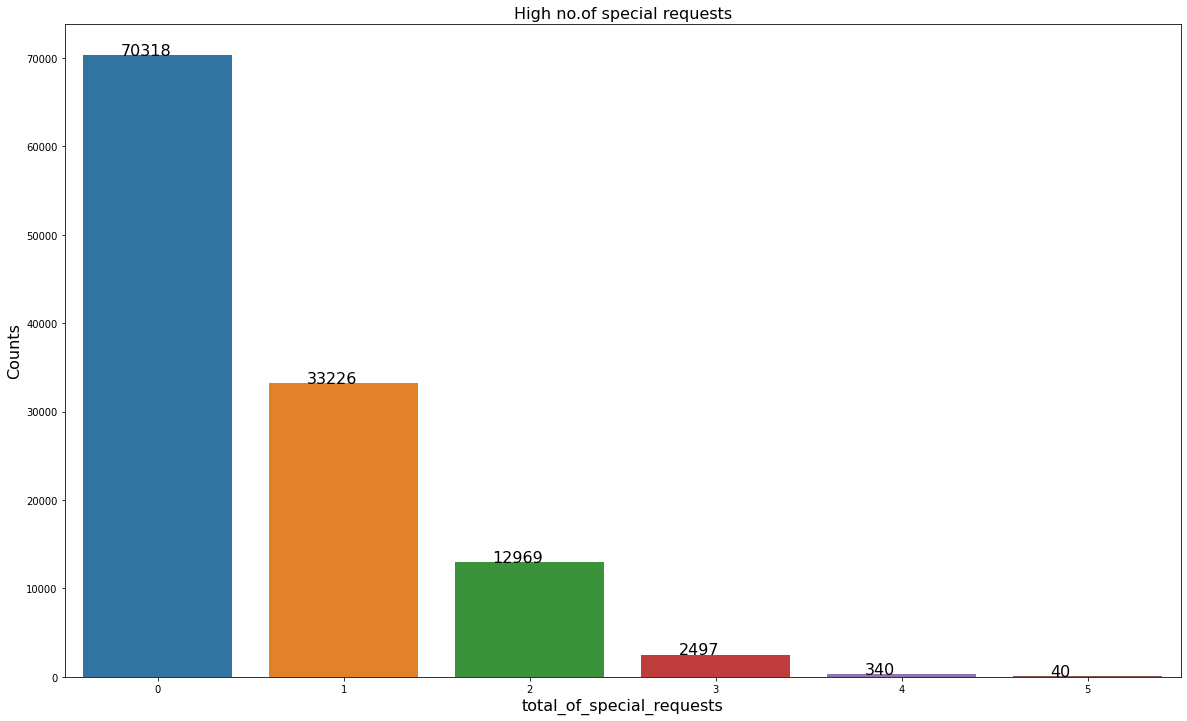

In [29]:
plt.figure(figsize=(20,12))
ch = sns.countplot(HBA['total_of_special_requests'])
plt.xlabel('total_of_special_requests', size=16)
plt.ylabel('Counts', size=16)
plt.title('High no.of special requests', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=16)
plt.show()

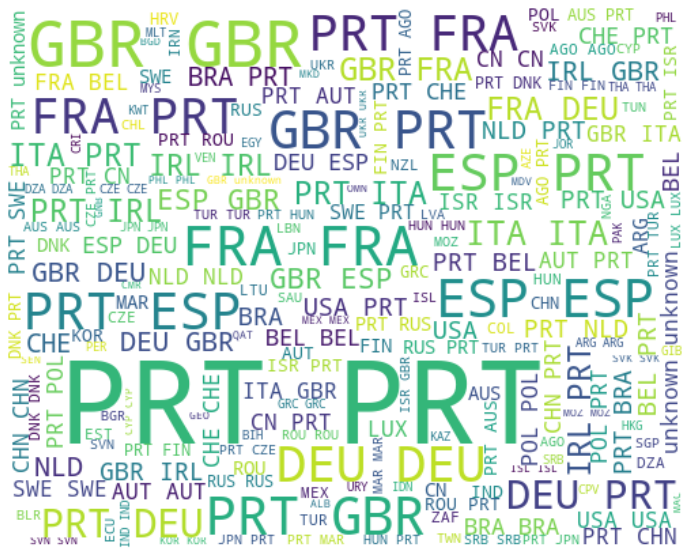

In [30]:
from wordcloud import WordCloud
from scipy import signal
WordCloud(collocations=False)
state= HBA.country.dropna(0)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(max_words=200,background_color = 'white',
                     width = 500,
                     height = 400).generate(' '.join(state))
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [31]:
HBA.country.value_counts()[:15]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
Name: country, dtype: int64

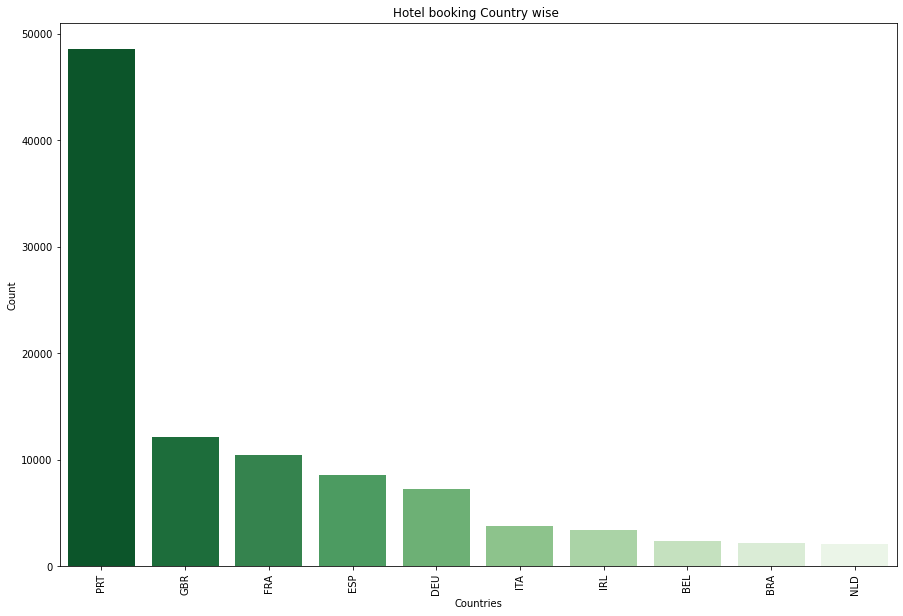

In [32]:
plt.subplots(figsize=(15,10))
sns.barplot(HBA['country'].value_counts()[:10].index,HBA['country'].value_counts()[:10].values,palette='Greens_r')
plt.title('Hotel booking Country wise ')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

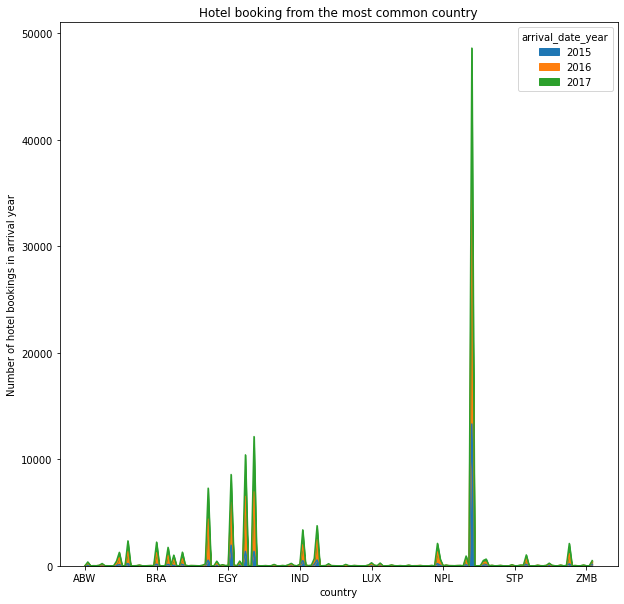

In [33]:
pd.crosstab(HBA.country,HBA.arrival_date_year).plot(kind='area',figsize=(10,10))
plt.title('Hotel booking from the most common country')
plt.ylabel('Number of hotel bookings in arrival year')
plt.show()

DATA PREPROCESSING

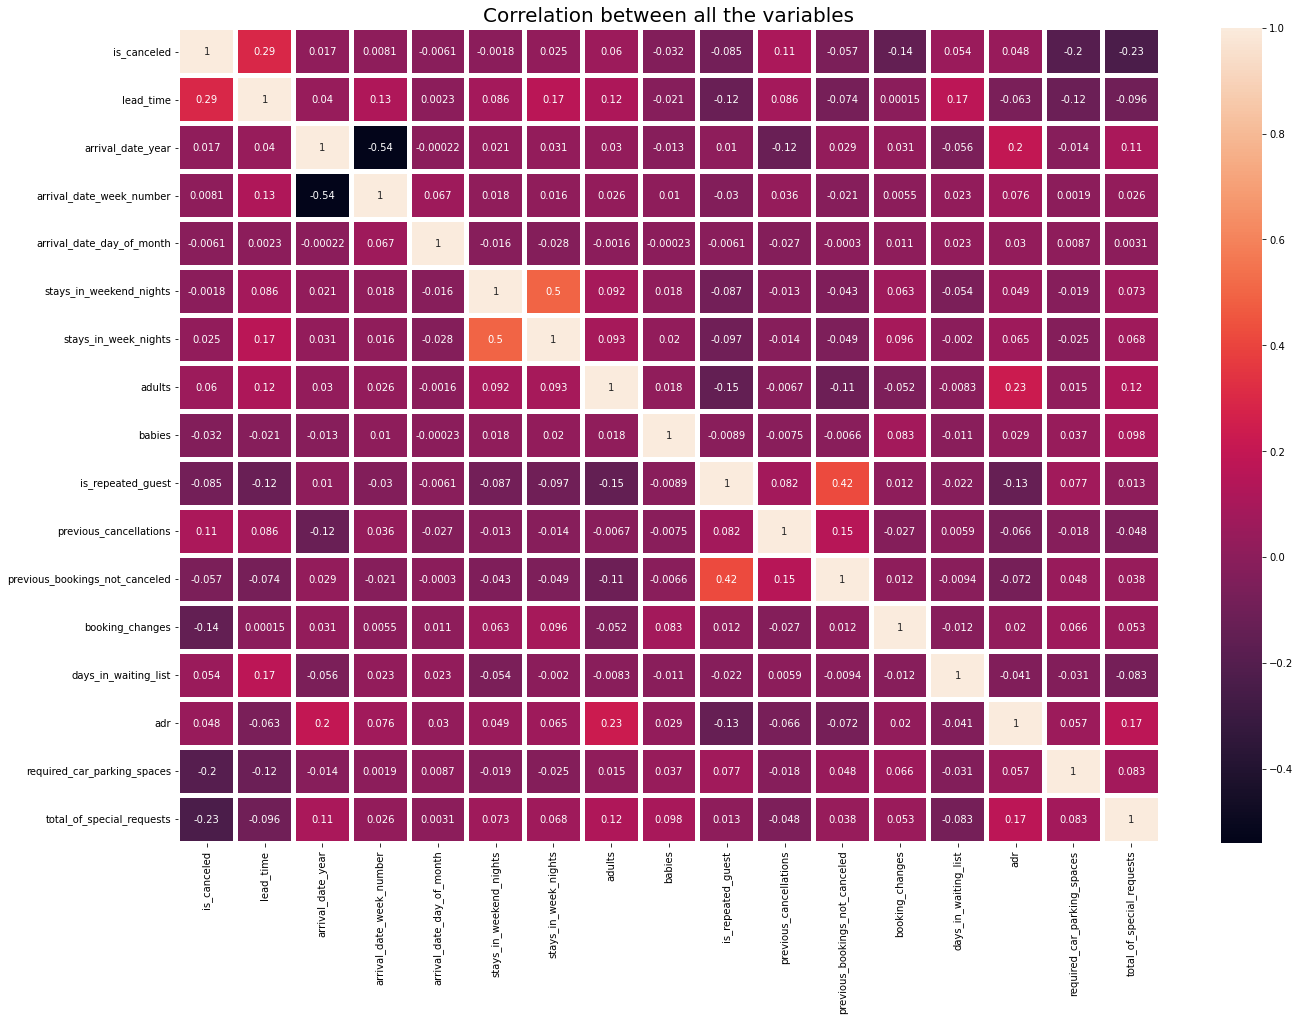

In [34]:
plt.figure(figsize=(22,15))
sns.heatmap(HBA.corr(), annot=True,linewidths=4)
plt.title('Correlation between all the variables',size=20,)
plt.show() 

In [35]:
corr=HBA.corr()
corr
correlation = HBA.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

The first 5 variables (lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes, previous_cancellations) will be used for building a model, since they are the ones with correlation > 0.10 for is_canceled.

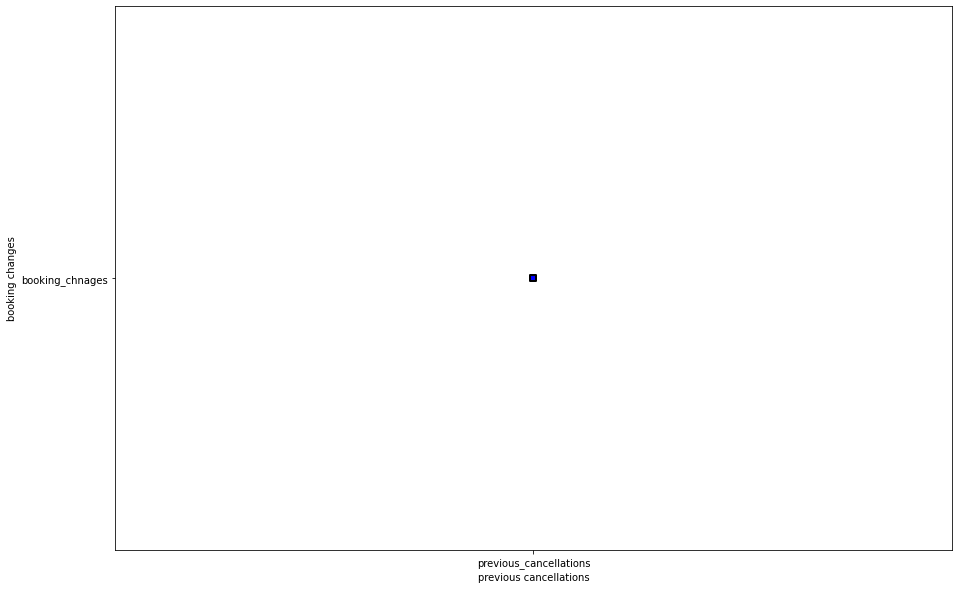

In [36]:
#dataset -1

y=['booking_chnages']
x=['previous_cancellations']
plt.scatter(x,y,c='blue',linewidths=2,marker='s',edgecolors='black')
plt.xlabel('previous cancellations')
plt.ylabel('booking changes')
plt.show()

In [37]:
leadtime=HBA['lead_time'].unique()
leadtime
leadtime.sort()
print(leadtime)



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [38]:
special_req=HBA['total_of_special_requests'].unique()
special_req.sort()
print(special_req)

[0 1 2 3 4 5]


In [39]:
parking_req=HBA['required_car_parking_spaces'].unique()
parking_req.sort()
print(parking_req)

[0 1 2 3 8]


In [40]:
changes_in_booking=HBA['booking_changes'].unique()
changes_in_booking.sort()
print(changes_in_booking)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]


In [41]:
pre_scan=HBA['previous_cancellations'].unique()
pre_scan.sort()
print(pre_scan)

[ 0  1  2  3  4  5  6 11 13 14 19 21 24 25 26]


In [42]:

country_visitors = HBA[HBA['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')
country_visitors

,country,count


In [43]:
# We will be using Plotly.express to plot a choropleth map. Big fan of Plotly here!
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

Text(0.5, 1.0, 'Types of market segment')

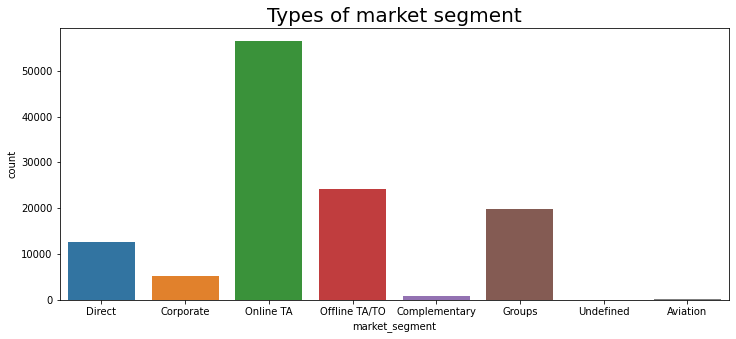

In [44]:
#Looking into market segments and distribution channel
plt.figure(figsize=(12,5))
sns.countplot(data = HBA, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

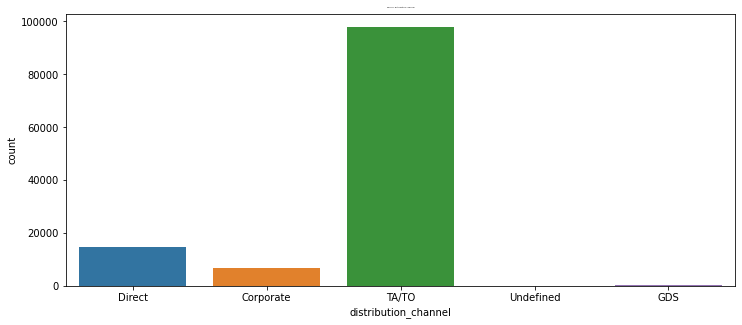

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(data = HBA, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 2)

Majority of the distribution channels and market segments involve travel agencies (online or offline).
We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

Let's see Guests pay for a room per night 

In [46]:
data = HBA[HBA['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

How does the price vary per night over the year?

In [47]:
data_resort = HBA[(HBA['hotel'] == 'Resort Hotel') & (HBA['is_canceled'] == 0)]
data_city = HBA[(HBA['hotel'] == 'City Hotel') & (HBA['is_canceled'] == 0)]

In [48]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [49]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [50]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


Now we observe here that month column is not in order, and if we visualize we will get improper conclusions.

So, first we have to provide right hierarchy to month column.

In [51]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=9efb90fd2db39e451bb629ff366ff14b87ff7a285e8b58ab3a78eaf6dacd87eb
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=669880141193802816debfd38a533ba0ec974598bec55f1fa8910bd7fd29f1a4
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [52]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [53]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


How long do people stay at the hotels?

In [54]:
filter = HBA['is_canceled'] == 0
data = HBA[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,unknown,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [55]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,unknown,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [56]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [57]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

Which countries have highest percentage of customers

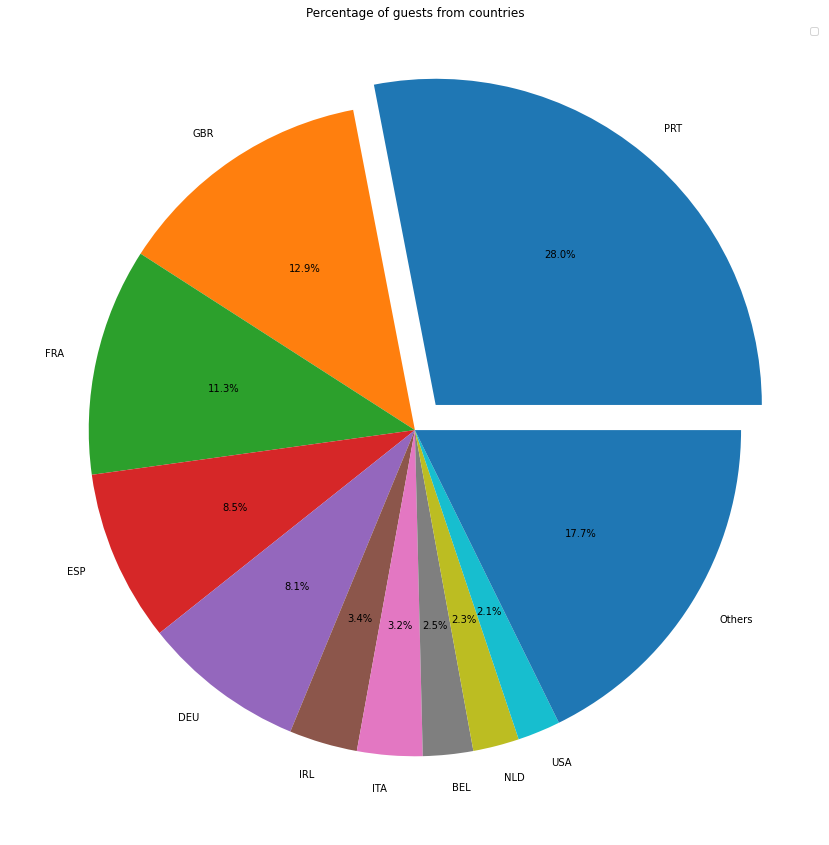

In [58]:
guests_per_country = HBA[HBA.is_canceled == 0].groupby('country').hotel.count().sort_values(ascending = False)
guests_per_country = guests_per_country.reset_index()
guests_per_country.rename(columns = {'hotel' : 'bookings'}, inplace = True)


# The top 10 countries with highest number of bookings
guests_per_country_top_10 = guests_per_country[:10].copy()

# Others countries bookings combined
new_row = pd.DataFrame(data = { 'country' : ['Others'],
                                'bookings' : [guests_per_country['bookings'][10:].sum()]
                                })

guests_per_country = pd.concat([guests_per_country_top_10, new_row])


#Pie chart Plot
fig = plt.figure(figsize =(15, 15)) 
plt.title("Percentage of guests from countries")
plt.legend(guests_per_country.index, loc="best")
plt.pie(guests_per_country.bookings , autopct='%1.1f%%', labels=guests_per_country.country , explode =(0.1,0,0,0,0,0,0,0,0,0,0));

Bookings / Cancelled Bookings by different types of customers.

     customer_type  is_canceled  bookings
0         Contract            0      2814
1         Contract            1      1262
2            Group            0       518
3            Group            1        59
4        Transient            0     53099
5        Transient            1     36514
6  Transient-Party            0     18735
7  Transient-Party            1      6389


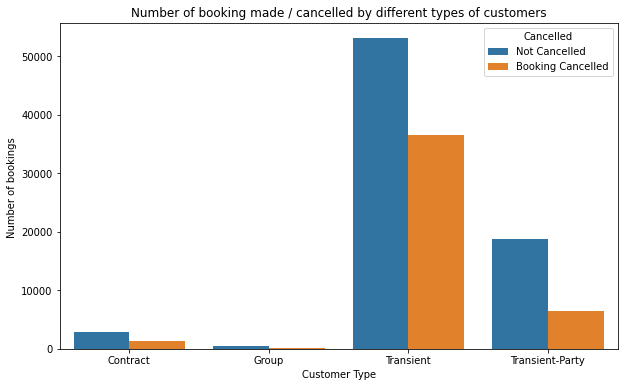

In [59]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = HBA.groupby(['customer_type','is_canceled']).count().hotel.reset_index()
customer_bookings.rename(columns = {'hotel':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

ax = sns.barplot('customer_type', 'bookings', hue='is_canceled', data=customer_bookings );

plt.title("Number of booking made / cancelled by different types of customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings ")

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Cancelled', 'Booking Cancelled'], title='Cancelled');

Hotel preference by Customer type.

     customer_type         hotel  bookings
0         Contract    City Hotel      2300
1         Contract  Resort Hotel      1776
2            Group    City Hotel       293
3            Group  Resort Hotel       284
4        Transient    City Hotel     59404
5        Transient  Resort Hotel     30209
6  Transient-Party    City Hotel     17333
7  Transient-Party  Resort Hotel      7791


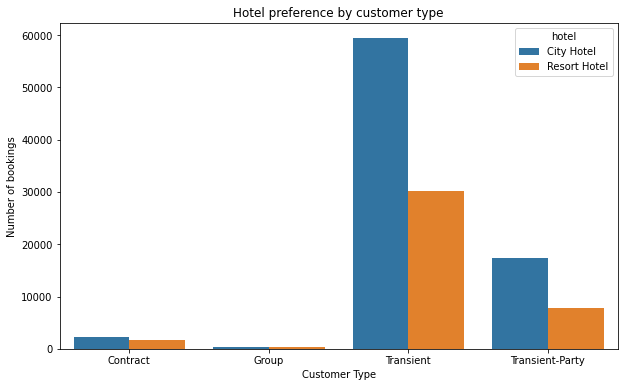

In [60]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = HBA.groupby(['customer_type','hotel']).count().lead_time.reset_index()
customer_bookings.rename(columns = {'lead_time':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

sns.barplot('customer_type', 'bookings', hue='hotel', data=customer_bookings );

plt.title("Hotel preference by customer type")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings");

How many days in advance are most of the bookings made.

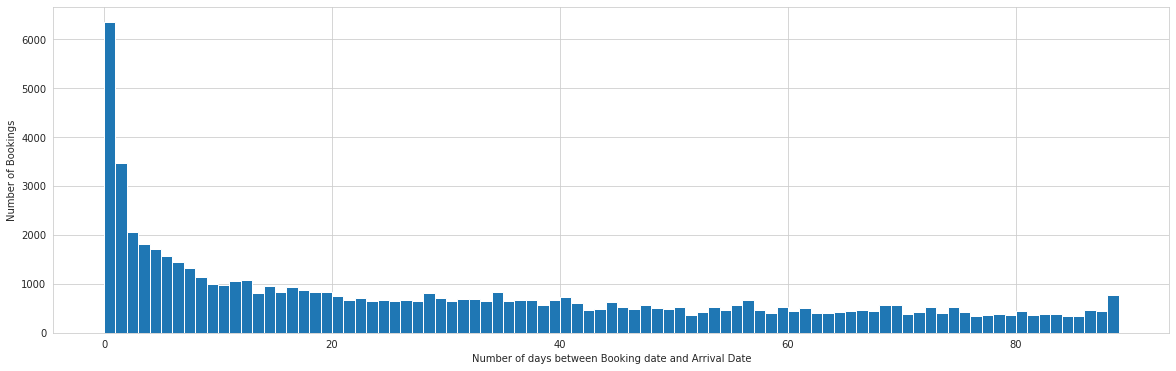

In [61]:
# df.lead_time
# Plot histogram for 90 days or 3 months of lead time

sns.set_style("whitegrid")
plt.figure(figsize = (20,6))
plt.hist(HBA.lead_time, bins=np.arange(0, 90, 1));


plt.xlabel("Number of days between Booking date and Arrival Date")
plt.ylabel("Number of Bookings");

Meal preference by customers

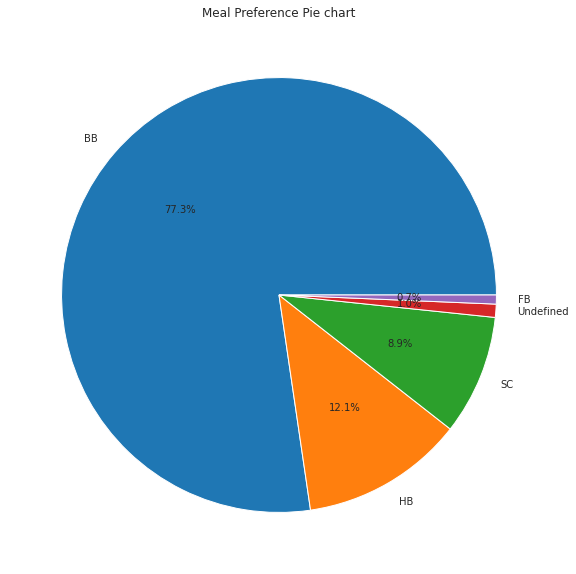

In [62]:
meal_preference = HBA.meal.value_counts()
meal_preference.index.name = "meal_type"
meal_preference = meal_preference.reset_index()
meal_preference

plt.figure(figsize = (15,10))
plt.pie(meal_preference.meal, autopct='%1.1f%%', labels=meal_preference.meal_type);

plt.title("Meal Preference Pie chart");

Meal

In [70]:
HBA.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

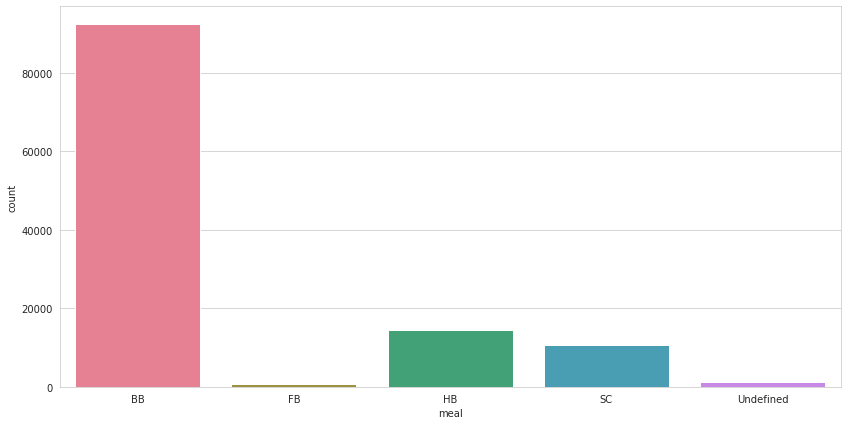

In [71]:
plt.figure(figsize=(14,7))
sns.countplot(HBA['meal'], palette='husl')
plt.show()

Customer Type

In [72]:
HBA.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

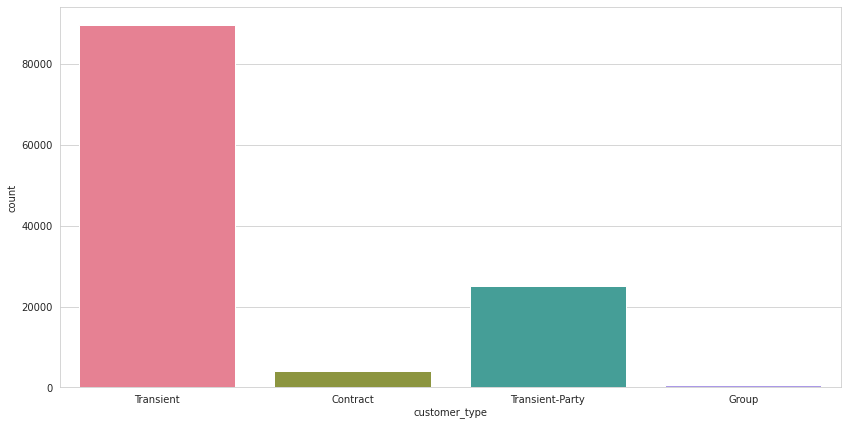

In [74]:
plt.figure(figsize=(14,7))
sns.countplot(HBA['customer_type'], palette='husl')
plt.show()

What is the most popular meal package?

In [76]:
HBA.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

The Bed & Breakfast option is the most popular, with a frequency of 77.26%.

Which are the three most common and uncommon countries of origin?

In [75]:
print('Most common countries:')
print(HBA.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(HBA.country.value_counts().tail(35))

Most common countries:
PRT    48590
GBR    12129
FRA    10415
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
ZMB    2
GLP    2
LAO    2
ATA    2
TGO    2
GUY    1
SDN    1
ASM    1
UMI    1
ATF    1
NPL    1
LCA    1
MMR    1
BHS    1
NCL    1
HND    1
NAM    1
AIA    1
FJI    1
SMR    1
DMA    1
NIC    1
CYM    1
KIR    1
DJI    1
PYF    1
BWA    1
MDG    1
MLI    1
PLW    1
MRT    1
SLE    1
BFA    1
BDI    1
VGB    1
Name: country, dtype: int64


As we can see, Portugal tops the list with 48,586 of the cases, followed by Great Britain with 12,129 and France with 10,415.
There are 30 countries that can be considered as the most uncommon country of origin, with 1 guest per country. Among these, we have Madagascar, Dominica, Mali, Guyana, Palau, Kiribati, Sudan, etc.